In [3]:
from drop_lib2 import *
from scipy.io import loadmat
import pickle
from sktime.classification.kernel_based import RocketClassifier

directory = 'minirocket'
verbose = 1
data = load_data(verbose=verbose)

Loaded segments shape: (842, 25000)
Speed labels shape: (842,)
Volume labels shape: (842,)
Unique speeds: [1.72 2.08 2.36 2.64 3.13 3.39 3.42]
Unique volumes: [55 77]


 20%|██        | 1/5 [01:24<05:37, 84.34s/it]

Velocity accuracy (fold): 0.9763


 40%|████      | 2/5 [02:49<04:14, 84.68s/it]

Velocity accuracy (fold): 0.9704


 60%|██████    | 3/5 [04:13<02:49, 84.53s/it]

Velocity accuracy (fold): 0.9702


 80%|████████  | 4/5 [05:37<01:24, 84.25s/it]

Velocity accuracy (fold): 0.9762


100%|██████████| 5/5 [07:02<00:00, 84.41s/it]


Velocity accuracy (fold): 0.9702
Velocity accuracy average across all folds: 0.9727±0.0029


 20%|██        | 1/5 [01:24<05:36, 84.19s/it]

Volume accuracy (fold): 0.9408


 40%|████      | 2/5 [02:48<04:12, 84.27s/it]

Volume accuracy (fold): 0.9290


 60%|██████    | 3/5 [04:12<02:48, 84.15s/it]

Volume accuracy (fold): 0.9524


 80%|████████  | 4/5 [05:35<01:23, 83.62s/it]

Volume accuracy (fold): 0.9345


100%|██████████| 5/5 [06:57<00:00, 83.59s/it]

Volume accuracy (fold): 0.9464
Volume accuracy average across all folds - : 0.9406±0.0083
Results saved in directory: ./minirocket/
[[103   0   0   0   0   0   0]
 [  0 121   0   0   0   1   0]
 [  0   0 112   0   0   0   1]
 [  0   0   0 181   0   1   0]
 [  0   0   0   0  76   0  12]
 [  0   0   0   1   0 141   0]
 [  0   0   0   0   7   0  85]]
[[342  27]
 [ 23 450]]


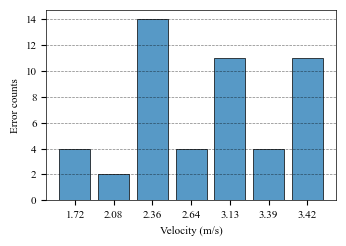

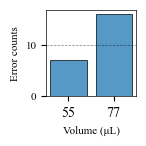

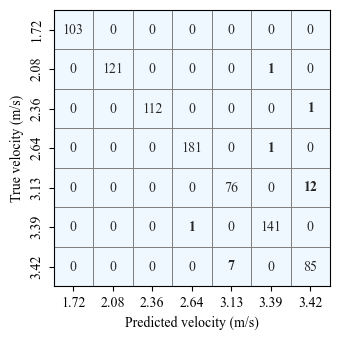

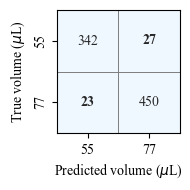

In [4]:
X = data['segments']
classifier = RocketClassifier(rocket_transform='minirocket',
                              random_state=42,
                              n_jobs=7)
confusion_matrices_speed, error_indices_speed, all_cv_scores_speed, \
confusion_matrices_volume, error_indices_volume, all_cv_scores_volume\
    = evaluate_classifier(classifier, classifier, X, data, random_state=42)
save_results(confusion_matrices_speed, error_indices_speed, all_cv_scores_speed,
             confusion_matrices_volume, error_indices_volume, all_cv_scores_volume,
             data,
             directory=directory, verbose=verbose)
plot_results(confusion_matrices_speed, error_indices_speed,
             confusion_matrices_volume, error_indices_volume,
             data,
             directory=directory, verbose=verbose)